In [62]:
# 股票的话我可以计算了之后再筛选每半年前800
# 这样就保证动作维数一致了 
# 或者难道再对比下
# 但是这样，怎么改DQNnet呢，
# 之前的监督学习一直都是分开算的，我也就分开算好了

In [1]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# df_test_hs300 = pd.read_pickle('datas/df_test_hs300.pkl')

In [ ]:
# df_test_hs300['hs300label']

In [2]:
with open('./all_transf2424_label1_sche_mse1e-4/pred.pkl.test0','rb')as f: # 
    pred1=pickle.load(f)
pred1.columns = ['score1','label2']

In [3]:
pred11 =  pred1.reset_index() #   pd.merge(pred1.reset_index(), pred2.reset_index()) # 

In [4]:
pred11.shape

(2381028, 4)

In [5]:
scores = 'score1'
(pred11[scores]>0).sum(),(pred11[scores]<0).sum(),(pred11[scores]==0).sum()
# 0,1 分别代表 sell，buy
# 0,1,2 分别代表 buy,noact,sell,即 1,0,-1

(1706848, 674180, 0)

In [6]:
# pred11.loc[:,'xt'] = 0

In [7]:
pred11['datetime'] = pd.to_datetime(pred11['datetime'] )

In [8]:
df_all = pred11.copy() #pred1.reset_index()  #pd.merge(pred1.reset_index(), pred5.reset_index()) # #  #pred5.reset_index() #
# df_all['datetime'] = pd.to_datetime(df_all['datetime'] )
df_all= df_all.set_index(['instrument','datetime'])

In [9]:
df_norm = df_all.copy()
scores = 'score1'
days = 90
df_norm['rolling_mean'] = df_norm.groupby('instrument',as_index=False)[scores].rolling(window = days,min_periods=1).mean()[scores]

df_norm['rolling_std'] = df_norm.groupby(['instrument'],as_index=False)[scores].rolling(window = days,min_periods=1).std()[scores]

# df_norm = df_norm.fillna(1)
df_norm['normscore'] = (df_norm[scores]-df_norm['rolling_mean'])/df_norm['rolling_std']

In [10]:
df_norm['normscorer'] = df_norm.groupby('instrument',as_index=False)[scores].rolling(window = 5,min_periods=1).mean()[scores]

In [11]:
scores = 'normscore'  #'score1' # 'normscore'  # 
labels = 'label2'
yuzhi = 0.8
df_all = df_norm[df_norm[scores].notna()] #.copy() #pred11.copy()
top_800_stocks = df_all.copy()
low_800_stocks = df_all.copy()
stocks_shaixuan = df_all.copy()
# stocks_shaixuan[scores] = df_all[scores].apply(lambda x: -1 if x ==0 else x)
stocks_shaixuan[scores] = df_all[scores].apply(lambda x: 0 if x < yuzhi and x> -yuzhi  else x)
top_800_stocks[scores] = df_all[scores].apply(lambda x: 0 if x <= yuzhi else x)
low_800_stocks[scores] = df_all[scores].apply(lambda x: 0 if x > -yuzhi else x)
# top_800_stocks['Ref'] = np.sign(top_800_stocks[scores]) * top_800_stocks[labels]
# low_800_stocks['Ref'] = np.sign(low_800_stocks[scores]) * low_800_stocks[labels]
# stocks_shaixuan['Ref'] = np.sign(stocks_shaixuan[scores]) * stocks_shaixuan[labels]
top_800_stocks['Ref'] = (top_800_stocks[scores]) * top_800_stocks[labels]
low_800_stocks['Ref'] = (low_800_stocks[scores]) * low_800_stocks[labels]
stocks_shaixuan['Ref'] = (stocks_shaixuan[scores]) * stocks_shaixuan[labels]

In [12]:
holdcangwei = (top_800_stocks.groupby('datetime')[scores].mean()*df_all.groupby('datetime')[labels].mean()).reset_index()
holdcangwei['TIR'] = holdcangwei[0].cumsum()
holdxiangu = top_800_stocks.copy()
holdxiangu['Ref'] = np.sign(holdxiangu[scores]) * holdxiangu[labels]

In [58]:
top_800_stocks[top_800_stocks[scores]>0]

,,score1,label2,rolling_mean,rolling_std,normscore,normscorer,Ref,count
instrument,datetime,,,,,,,,
000005.SZ,2020-01-06,0.002806,0.016101,0.001775,0.000893,1.154660,0.001775,0.018592,1
000009.SZ,2020-01-06,0.003701,0.016995,-0.002425,0.005518,1.110049,-0.002425,0.018866,1
000011.SZ,2020-01-06,0.002968,0.017175,0.002405,0.000522,1.077662,0.002405,0.018509,1
000012.SZ,2020-01-06,0.003270,0.010038,0.001656,0.001935,0.834325,0.001656,0.008375,1
000016.SZ,2020-01-06,0.003695,0.020391,0.002699,0.000866,1.150057,0.002699,0.023451,1
...,...,...,...,...,...,...,...,...,...
688516.SH,2024-05-22,0.006650,-0.045827,0.001238,0.004174,1.296400,0.004788,-0.059411,1
688567.SH,2024-05-22,0.006352,-0.036145,0.001623,0.004517,1.046658,0.003939,-0.037831,1
688598.SH,2024-05-22,0.010992,-0.057459,0.001500,0.008389,1.131457,0.008608,-0.065013,1


<Axes: xlabel='datetime'>

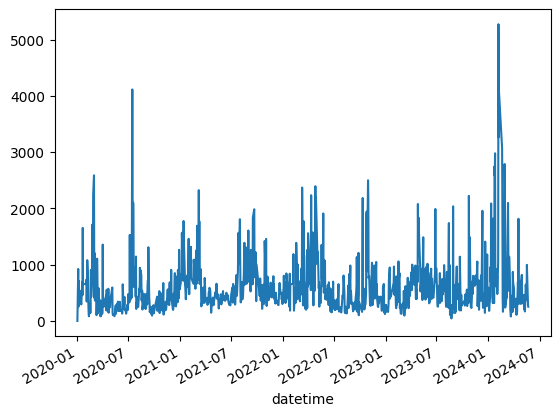

In [13]:
top_800_stocks.groupby('datetime')[scores].sum().plot()

In [14]:
# top_800_stocks[((top_800_stocks[scores]!=0).astype(int) * top_800_stocks[scores].notna().astype(int)).astype(bool)][:50]

In [15]:
huanshou = (stocks_shaixuan.groupby(['instrument'])[scores].shift(1) * stocks_shaixuan[scores] <0).groupby(['instrument']).sum().mean()/5.5
huanshou

7.760741364785173

In [16]:
# 计算得分的符号乘以标签的值
def cal_cumsum_mancang(top_800_stocks):
    # daily_scores_sum = top_800_stocks.groupby('datetime')['Ref'].mean().reset_index() #sum？
    # daily_scores_sum['TIR'] = daily_scores_sum['Ref'].cumsum()
    daily_scores_sum = (top_800_stocks.groupby('datetime')['Ref'].sum()/top_800_stocks.groupby('datetime')[scores].sum()).reset_index()
    daily_scores_sum['TIR'] = daily_scores_sum[0].cumsum()
    return daily_scores_sum
# 计算得分的符号乘以标签的值
def cal_cumsum_cangwei(top_800_stocks):
    daily_scores_sum = top_800_stocks.groupby('datetime')['Ref'].mean().reset_index() #sum？
    daily_scores_sum['TIR'] = daily_scores_sum['Ref'].cumsum()
    # daily_scores_sum = (top_800_stocks.groupby('datetime')['Ref'].sum()/top_800_stocks.groupby('datetime')[scores].sum()).reset_index()
    # daily_scores_sum['TIR'] = daily_scores_sum[0].cumsum()
    return daily_scores_sum

In [17]:
daily_scores_sum_top_m = cal_cumsum_mancang(top_800_stocks)
daily_scores_sum_low_m = cal_cumsum_mancang(low_800_stocks)
all_score_m = cal_cumsum_mancang(stocks_shaixuan)
hold_xiangu_m = cal_cumsum_mancang(holdxiangu)

In [18]:
daily_scores_sum_top = cal_cumsum_cangwei(top_800_stocks)
daily_scores_sum_low = cal_cumsum_cangwei(low_800_stocks)
all_score = cal_cumsum_cangwei(stocks_shaixuan)
hold_xiangu = cal_cumsum_cangwei(holdxiangu)

In [19]:
# labels = 'label2'
def cal_cumsum_hold(top_800_stocks):
    daily_scores_sum = top_800_stocks.groupby('datetime')[labels].mean().reset_index()
    daily_scores_sum['TIR'] = daily_scores_sum[labels].cumsum()
    return daily_scores_sum
daily_scores_sum_hold = cal_cumsum_hold(df_all)

In [20]:
# # labels = 'label2to1'
# def cal_cumsum_hold_benchmark(top_800_stocks):
#     daily_scores_sum = top_800_stocks.groupby('datetime')['label2to1'].mean().reset_index()
#     daily_scores_sum['TIR'] = daily_scores_sum['label2to1'].cumsum()
#     return daily_scores_sum
# daily_scores_sum_holdhs300 = cal_cumsum_hold_benchmark(df_test_hs300['hs300label'])

波动率

In [21]:
js_df = daily_scores_sum_top.dropna().iloc[1:]

In [22]:
bodonglv = js_df['Ref'].std()* np.sqrt(244)
bodonglv

0.10312518991505701

年化收益率

In [23]:
nhsyl = ((js_df.iloc[-1]['TIR']+1)-(js_df.iloc[0]['TIR']+1))*(244./len(js_df)) 
nhsyl

0.24923114286872156

In [24]:
# 1.598388984**(244./len(js_df)) -1

Sharpe ratio 夏普比率

In [25]:
nhsyl/bodonglv # 1左右 正常

2.4167823891913343

最大回撤

In [26]:
# 依据累乘净值
cum_returns = (1+js_df['Ref']).cumprod()
peak = cum_returns.cummax()
drawdown = (cum_returns- peak)/peak
drawdown.min()

-0.07488880826696899

In [27]:
#依据累加净值
previos_max =  js_df['TIR'].cummax() # 计算上一个最高点
(js_df['TIR']-previos_max).min()

-0.07688563113026264

In [28]:
np.argmin(drawdown),(js_df['TIR']-previos_max).argmin()

(556, 556)

双边换手率

In [29]:
# 全满仓
# df_hs = pd.merge(top_800_stocks.reset_index(),top_800_stocks.groupby('datetime')[scores].sum().reset_index().rename(columns={scores: 'scores_sum'}))
# df_hs['cangwei'] = df_hs[scores]/df_hs['scores_sum']

In [30]:
# 按得分算仓位
top_800_stocks['count']=1
df_hs = pd.merge(top_800_stocks.reset_index(),top_800_stocks.groupby('datetime')['count'].sum().reset_index().rename(columns={'count': 'scores_sum'}))
df_hs['cangwei'] = df_hs[scores]/df_hs['scores_sum']

In [31]:
# df_hs = top_800_stocks.copy()
df_hs['prev_score'] = df_hs.groupby('instrument')['cangwei'].shift(1).fillna(0)

In [32]:
# initial_capital = 1
df_hs['buy_amount'] = (df_hs['cangwei'] - df_hs['prev_score']).clip(lower=0)
df_hs['sell_amount'] =  (df_hs['prev_score'] - df_hs['cangwei']).clip(lower=0)
# 计算每日资产价值
# df['daily_return'] = df

In [33]:
df_hs.groupby(['datetime']).agg({'buy_amount':'sum', 'sell_amount':'sum' }).sum()*(244/1332) # 所有股票总换手 # 年化

buy_amount     35.730641
sell_amount    35.700235
dtype: float64

In [34]:
df_hs['Ref'] = (df_hs['cangwei']) * df_hs[labels]
daily_scores_sum = df_hs.groupby('datetime')['Ref'].sum().reset_index() #sum？
daily_scores_sum['TIR'] = daily_scores_sum['Ref'].cumsum()

In [35]:
df_hs_agg = df_hs.groupby(['datetime']).agg({'Ref':'sum','buy_amount':'sum', 'sell_amount':'sum' })

In [36]:
def cal_net_value_with_fees(df, initial_net_value, transaction_fee_rate):
    df = df.sort_values(by='datetime').copy()
    # df['transaction_fees']
    df['net_value'] = initial_net_value 
    for i in range(1,len(df)):
        previous_net_Values = df.loc[i-1,'net_value']
        daily_return = df.loc[i,'Ref']
        # 计算交易费用
        buy_amount = df.loc[i, 'buy_amount']
        sell_amount = df.loc[i, 'sell_amount']
        transaction_fees = (buy_amount + sell_amount)*transaction_fee_rate

        #
        df.loc[i,'net_value'] = previous_net_Values*(1 + daily_return) - transaction_fees
    return df 

In [37]:
net_value_df = cal_net_value_with_fees(df_hs_agg.reset_index(), 1.0, 0.0005)

In [38]:
# net_value_df.to_excel('net_value_df.xlsx')

In [39]:
# df_hs.to_excel('df_hs.xlsx')
# df_hs.groupby(['datetime']).agg({'Ref':'sum','buy_amount':'sum', 'sell_amount':'sum' }).to_excel('df_hs_agg.xlsx')

区间平均仓位

In [40]:
qjpjcw = df_hs.groupby('datetime')['cangwei'].sum().mean()
qjpjcw

0.26495167984113177

胜率，赔率，看多看空比例

In [41]:
shenglv = ((df_hs[labels]>0) &(df_hs[scores]>0) ).sum()/(df_hs[scores]>0).sum()
shenglv

0.4907652668949942

In [42]:
peilv_a = df_hs[(df_hs[scores]>0) & (df_hs[labels]>0)][labels].sum()
peilv_b = df_hs[(df_hs[scores]>0) & (df_hs[labels]<0)][labels].sum()
peilv = - peilv_a/peilv_b
peilv

1.2454611

In [43]:
kzzb = (df_hs[scores]>0).sum()/len(df_hs)
kdzb = (df_hs[scores]<0).sum()/len(df_hs)
kzzb, kdzb

(0.17442679767633293, 0.0)

超额收益

In [44]:
# # daily_scores_sum
# chaoe = pd.merge(daily_scores_sum,daily_scores_sum_holdhs300, on=['datetime']).iloc[2:]
# chaoe['chaoe'] = chaoe['TIR_x'] - chaoe['TIR_y']

In [45]:
chaoe['chaoe'].std()

NameError: name 'chaoe' is not defined

In [ ]:
chaoe['fund_return'] = chaoe['TIR_x'].pct_change().fillna(0)
chaoe['benchmark_return'] = chaoe['TIR_y'].pct_change().fillna(0)

In [ ]:
chaoe['excess_return'] = chaoe['fund_return']-chaoe['benchmark_return'] 

In [325]:
chaoe['excess_return'].std()

0.053504934841349855

In [326]:
# chaoe['excess_return'].mean()/chaoe['excess_return'].std()

In [327]:
# 基准年化收益
jznhsyl = (daily_scores_sum_holdhs300.iloc[-1]['TIR']-daily_scores_sum_holdhs300.iloc[0]['TIR'])*(244/len(daily_scores_sum_holdhs300))
jznhsyl

0.04138958561527836

In [328]:
# 相对超额收益
(1+nhsyl)/(1+jznhsyl) -1

0.014949166401305725

信息比率(IR)=超额收益/跟踪误差

In [329]:
# 跟踪误差为超额收益的标准差
(nhsyl-jznhsyl)/chaoe['excess_return'].std()

0.2909620626604014

In [330]:
import quantstats as qs 

In [331]:
# qs.reports.html(daily_scores_sum.set_index(['datetime'])['Ref'], daily_scores_sum_holdhs300.set_index(['datetime'])['label2to1'],output='output.html')

In [332]:
# qs.stats.information_ratio(daily_scores_sum.set_index(['datetime'])['Ref'], daily_scores_sum_holdhs300.set_index(['datetime'])['label2to1'])

In [333]:
# scoreand300 = pd.merge(daily_scores_sum_top_m,daily_scores_sum_holdhs300,on='datetime')

In [46]:
signscore = top_800_stocks.groupby('datetime')[scores].sum().reset_index()

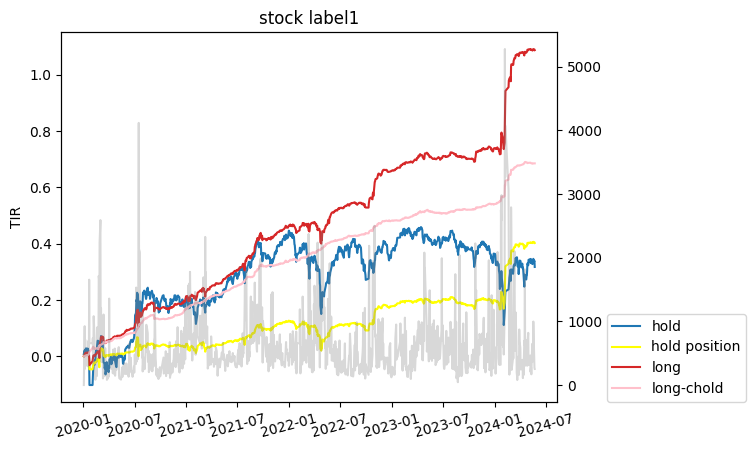

In [65]:
# plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
# plt.plot(net_value_df['datetime'],net_value_df['net_value']-1,label='koufeihou',color ='black')
# plt.plot(net_value_df['datetime'],(1+net_value_df['Ref']).cumprod()-1,label='koufeiqian',color ='gray')
# plt.figure(figsize=(6,12))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(signscore['datetime'],signscore['normscore'],alpha=0.3,color='gray',label='signscore')
ax1.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#1f77b4')
# plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
# ax1.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
ax1.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='hold position',color ='yellow')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
ax1.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
# ax1.plot(daily_scores_sum['datetime'],daily_scores_sum['TIR'],label='long2',color ='orange')
ax1.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='pink')
# plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

ax1.legend(fontsize = 10,bbox_to_anchor=(1.1,0), loc=3, borderaxespad=0 )
ax1.xaxis.set_tick_params(rotation=15)
ax1.set_ylabel('TIR')
plt.title('stock label1')
# mean, 标准化
# fig.subplots_adjust(right=1.2)
fig.savefig('stock label1.png',bbox_inches='tight')


Text(0.5, 1.0, 'index label2to1')

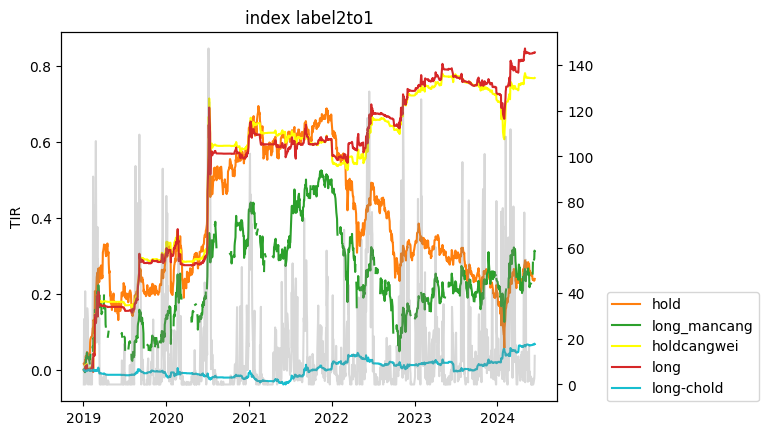

In [45]:
# plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
# plt.plot(net_value_df['datetime'],net_value_df['net_value']-1,label='koufeihou',color ='black')
# plt.plot(net_value_df['datetime'],(1+net_value_df['Ref']).cumprod()-1,label='koufeiqian',color ='gray')
# plt.figure(figsize=(6,12))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(signscore['datetime'],signscore['normscore'],alpha=0.3,color='gray',label='signscore')
ax1.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
# plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
ax1.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
ax1.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
ax1.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
ax1.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='#17becf')
# plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

ax1.legend(fontsize = 10,bbox_to_anchor=(1.1,0), loc=3, borderaxespad=0 )
plt.xticks(rotation=15)
ax1.set_ylabel('TIR')
plt.title('index label2to1')
# mean, 标准化
# fig.subplots_adjust(right=1.2)
# fig.savefig('index label2to1.png',bbox_inches='tight')


Text(0.5, 1.0, 'csi300 label2to1_chaoe')

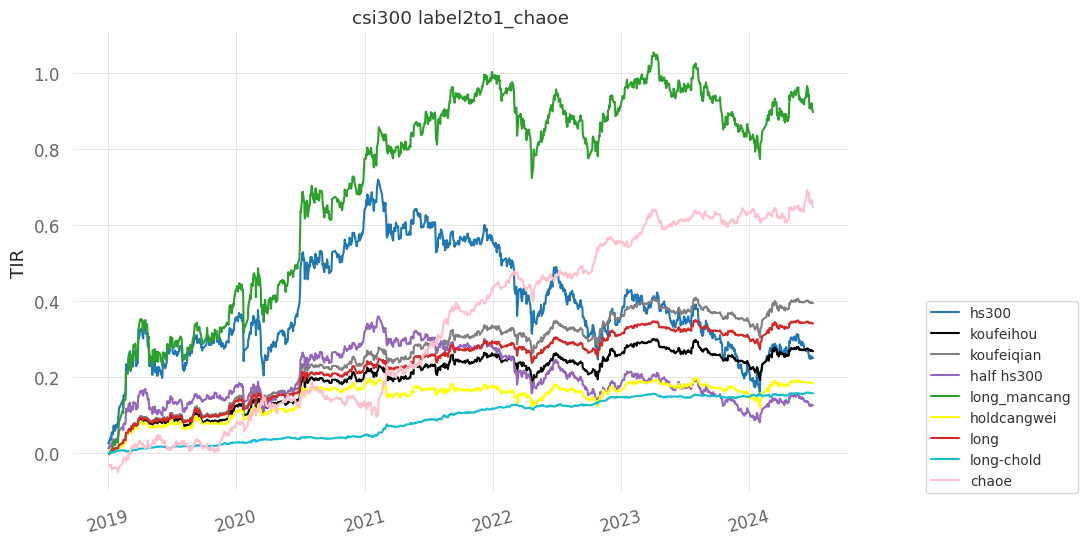

In [72]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(net_value_df['datetime'],net_value_df['net_value']-1,label='koufeihou',color ='black')
plt.plot(net_value_df['datetime'],(1+net_value_df['Ref']).cumprod()-1,label='koufeiqian',color ='gray')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='#17becf')
plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

plt.legend(fontsize = 10,bbox_to_anchor=(1.1,0), loc=3, borderaxespad=0 )
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_chaoe')
# mean, 标准化


Text(0.5, 1.0, 'csi800 label2to1_')

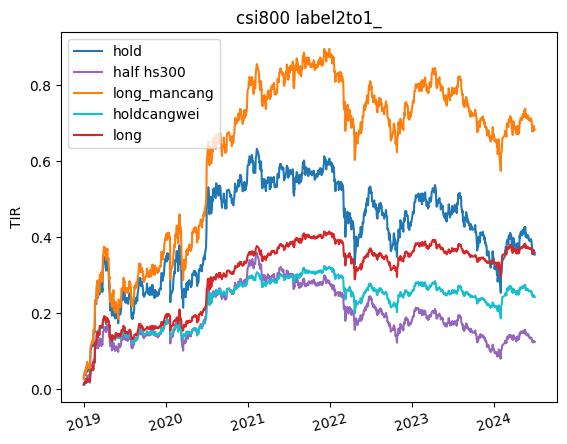

In [ ]:
# plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#2ca02c')
# plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#1f77b4')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#ff7f0e')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#yellow')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='#17becf')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')

plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi800 label2to1_')
# mean, 标准化

In [ ]:
scoreand300 = pd.merge(daily_scores_sum_top_m,daily_scores_sum_holdhs300,on='datetime')

Text(0.5, 1.0, 'csi300 label2to1_0.9std')

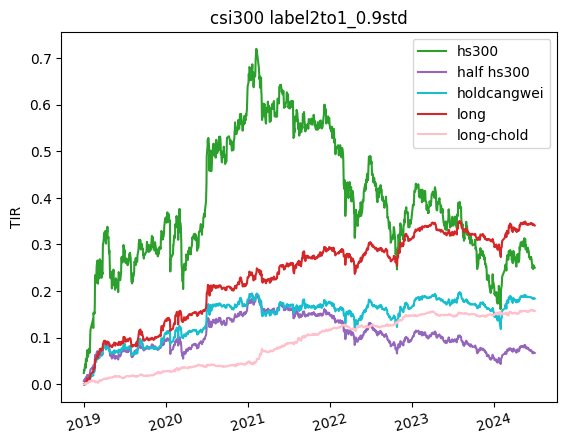

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#2ca02c')
# plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#1f77b4')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.2675*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
# plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#ff7f0e')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#yellow')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='#17becf')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='pink')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_0.9std')
# mean, 标准化
# # 市值加权，得分加权
# 会被问：控制回撤！！

Text(0.5, 1.0, 'csi300 label2to1_0.9std')

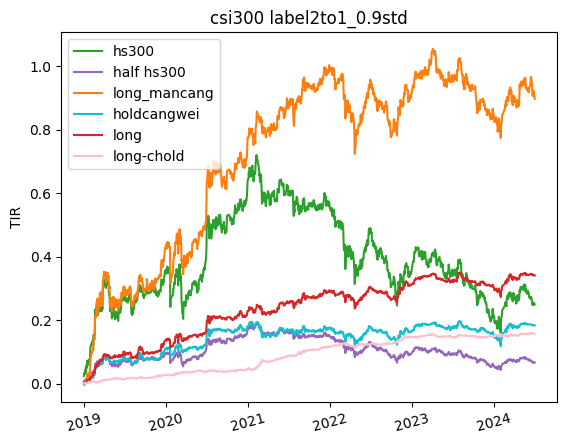

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#2ca02c')
# plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#1f77b4')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.2675*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#ff7f0e')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#yellow')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='#17becf')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='pink')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_0.9std')
# mean, 标准化
# # 市值加权，得分加权
# 会被问：控制回撤！！

Text(0.5, 1.0, 'csi300 label2to1_bs2k_chaoe pinghua3days')

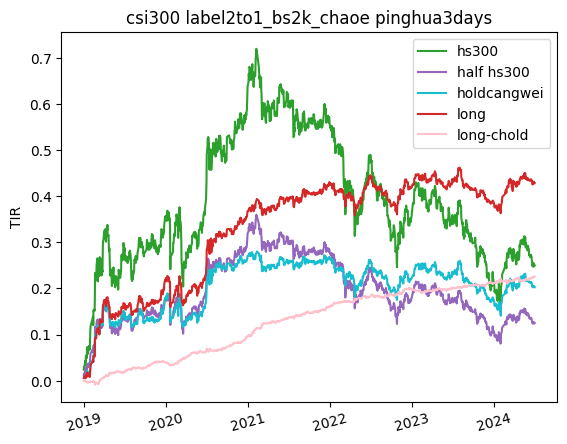

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#2ca02c')
# plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#1f77b4')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
# plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#ff7f0e')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#yellow')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='#17becf')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='pink')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_bs2k_chaoe pinghua3days')
# mean, 标准化
# # 市值加权，得分加权
# 会被问：控制回撤！！

Text(0.5, 1.0, 'csi300 label2to1_bs2k_chaoe pinghua3days')

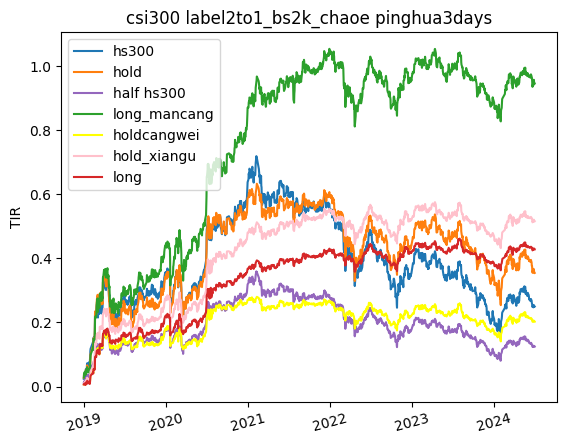

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')

plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_bs2k_chaoe pinghua3days')
# mean, 标准化


Text(0.5, 1.0, 'csi300 label2to1_sharploss 0.9std')

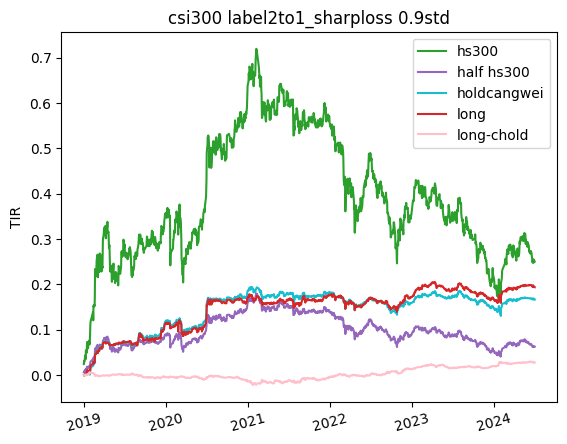

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#2ca02c')
# plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#1f77b4')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.25*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
# plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#ff7f0e')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#yellow')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='#17becf')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='pink')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_sharploss 0.9std')
# mean, 标准化
# # 市值加权，得分加权
# 会被问：控制回撤！！

Text(0.5, 1.0, 'csi300 label2to1_sharploss 0.9std')

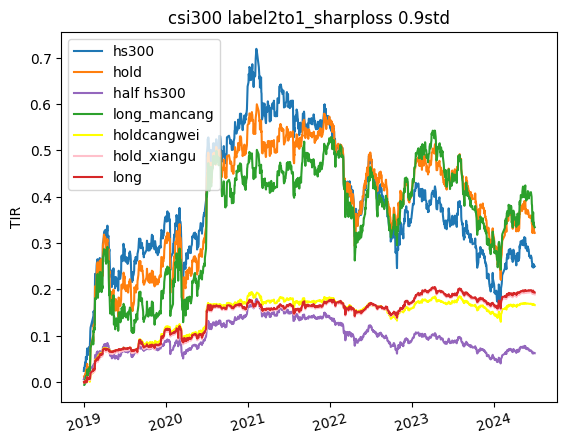

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.25*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')

plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_sharploss 0.9std')
# mean, 标准化


Text(0.5, 1.0, 'csi300 label6to1_chaoe 0.5std')

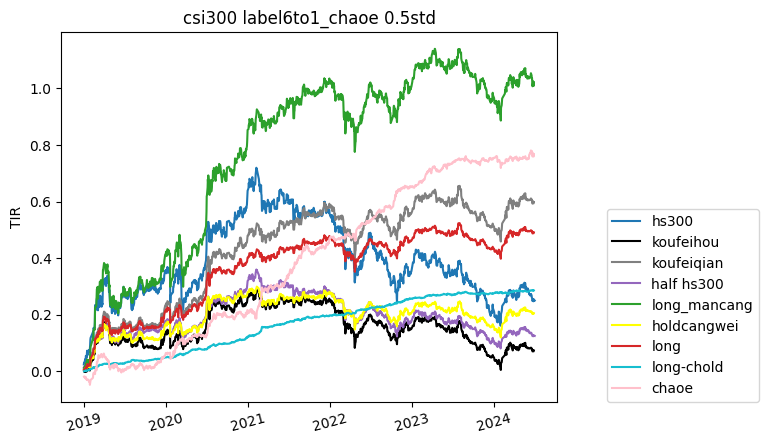

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(net_value_df['datetime'],net_value_df['net_value']-1,label='koufeihou',color ='black')
plt.plot(net_value_df['datetime'],(1+net_value_df['Ref']).cumprod()-1,label='koufeiqian',color ='gray')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
# plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR']-holdcangwei['TIR'],label='long-chold',color ='#17becf')
plt.plot(scoreand300['datetime'],scoreand300['TIR_x']- scoreand300['TIR_y'],label='chaoe',color ='pink')

plt.legend(fontsize = 10,bbox_to_anchor=(1.1,0), loc=3, borderaxespad=0 )
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label6to1_chaoe 0.5std')
# mean, 标准化


Text(0.5, 1.0, 'csi300 label2to1_bs2k_chaoe pinghua')

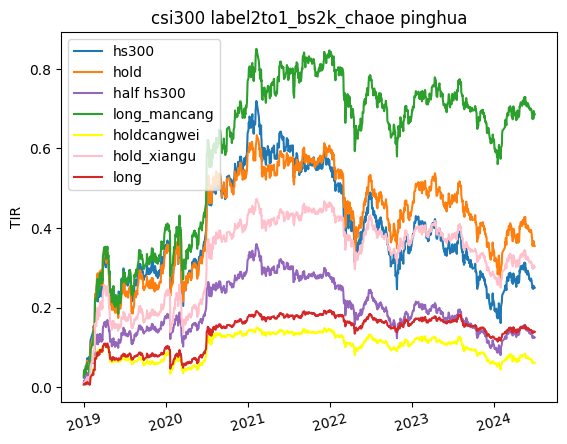

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
# plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')

plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_bs2k_chaoe pinghua')
# mean, 标准化


In [ ]:
# todo: sharp \ 波动率、换手率、最大回撤、平均仓位、
# 胜率、赔率，绝对收益、超额收益

Text(0.5, 1.0, 'csi300 label2to1_bs2k_chaoe')

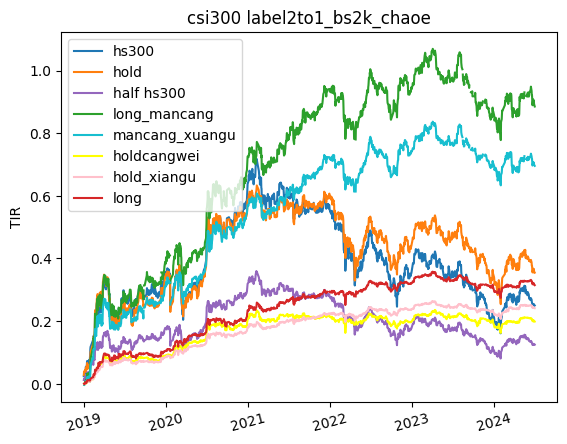

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
# plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
# plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top_m['datetime'],daily_scores_sum_top_m['TIR'],label='long_mancang',color ='#2ca02c')
plt.plot(hold_xiangu_m['datetime'],hold_xiangu_m['TIR'],label='mancang_xuangu',color ='#17becf')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
plt.plot(hold_xiangu['datetime'],hold_xiangu['TIR'],label = 'hold_xiangu',color = 'pink')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')

plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1_bs2k_chaoe 0.9std')
# mean, 标准化

Text(0.5, 1.0, 'csi300 label2to1 sharploss')

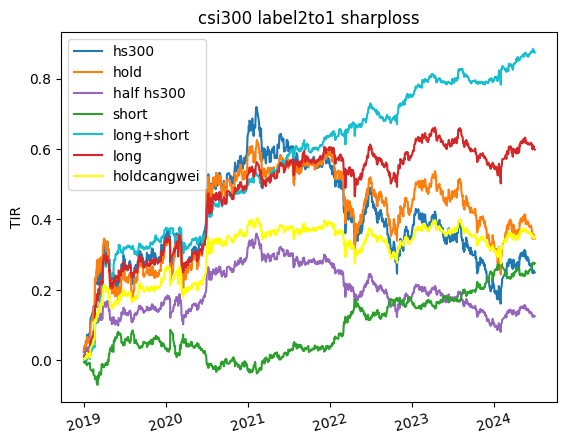

In [ ]:
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1 sharploss')
# mean, 标准化

Text(0.5, 1.0, 'Alpha180csi300 label2to1')

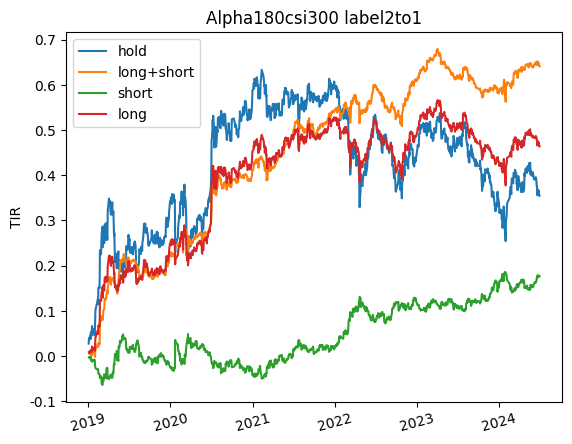

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('Alpha180csi300 label2to1')
# mean, 标准化

Text(0.5, 1.0, 'csi300 label6to1 chaoe')

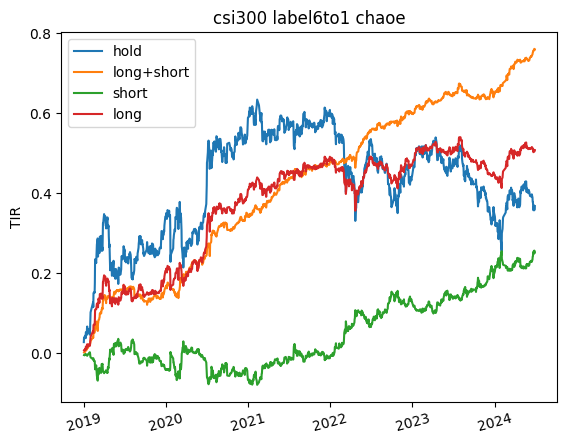

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label6to1 chaoe')
# mean, 标准化

Text(0.5, 1.0, 'csi300 label6to1')

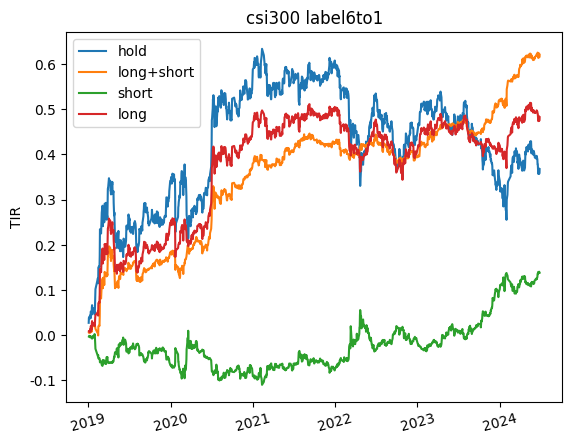

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label6to1')
# mean, 标准化

Text(0.5, 1.0, 'csi300 label6to1')

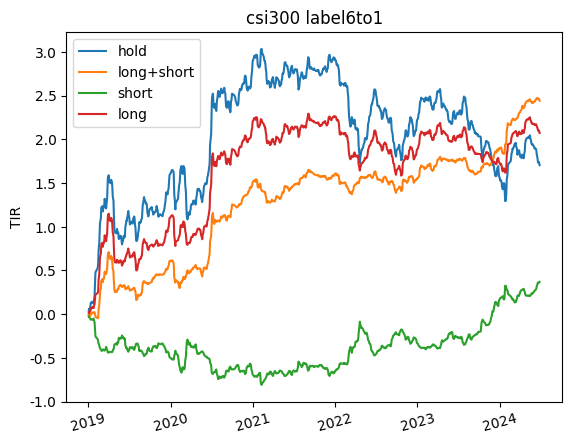

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label6to1')
# mean, 标准化

Text(0.5, 1.0, 'csi300 label2to1 chaoe std0.8')

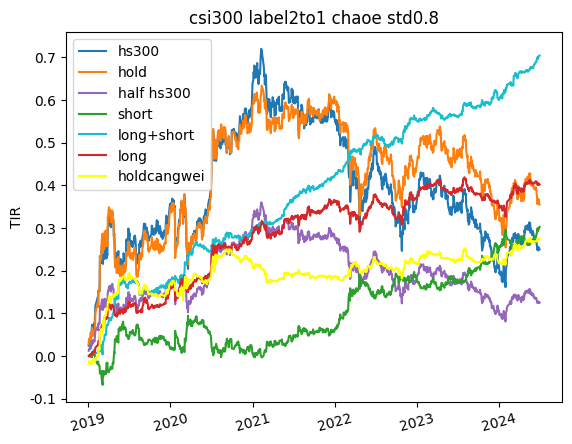

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')
# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1 chaoe std0.8')
# mean, 标准化

Text(0.5, 1.0, 'csi300 label2to1 chaoe')

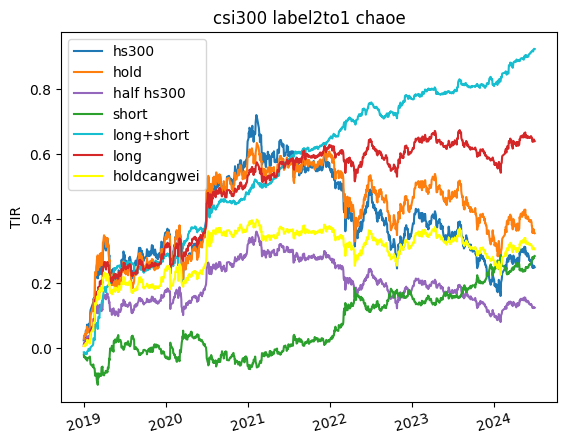

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(daily_scores_sum_holdhs300['datetime'],daily_scores_sum_holdhs300['TIR'],label='hs300',color ='#1f77b4')
plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold',color ='#ff7f0e')
plt.plot(daily_scores_sum_holdhs300['datetime'],0.5*daily_scores_sum_holdhs300['TIR'],label='half hs300',color ='#9467bd')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short',color ='#2ca02c')
plt.plot(all_score['datetime'],all_score['TIR'],label='long+short',color ='#17becf')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long',color ='#d62728')
plt.plot(holdcangwei['datetime'],holdcangwei['TIR'],label='holdcangwei',color ='yellow')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1 chaoe')
# mean, 标准化

Text(0.5, 1.0, 'csi300 label2to1')

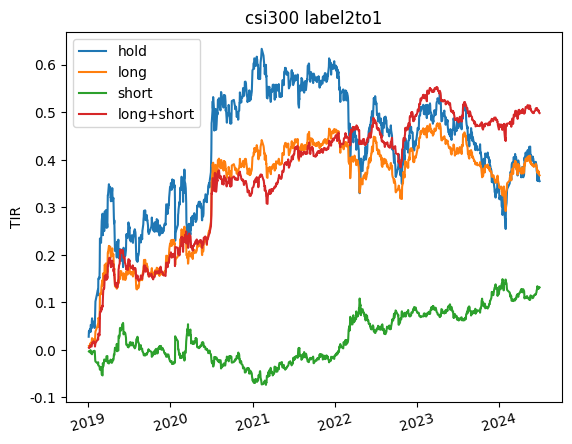

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('csi300 label2to1')
# mean, 标准化

Text(0.5, 1.0, '4 label1 test60')

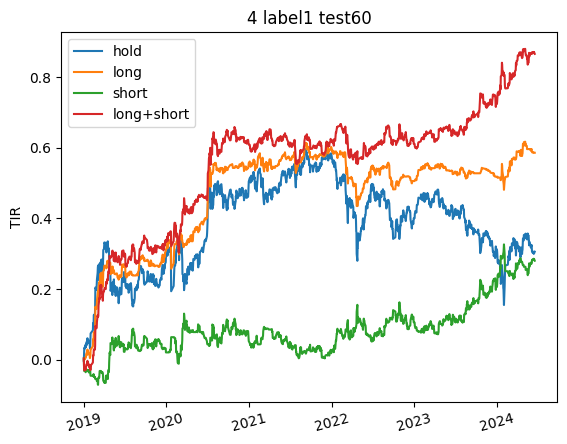

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('4 label1 test60')
# mean, 标准化

Text(0.5, 1.0, '4 label1')

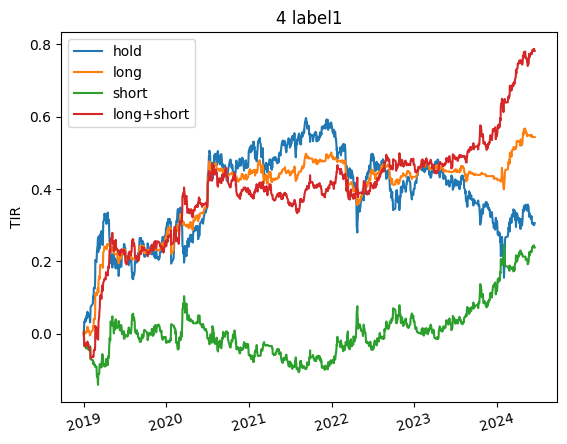

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('4 label1')
# mean, 标准化

Text(0.5, 1.0, '4 label1')

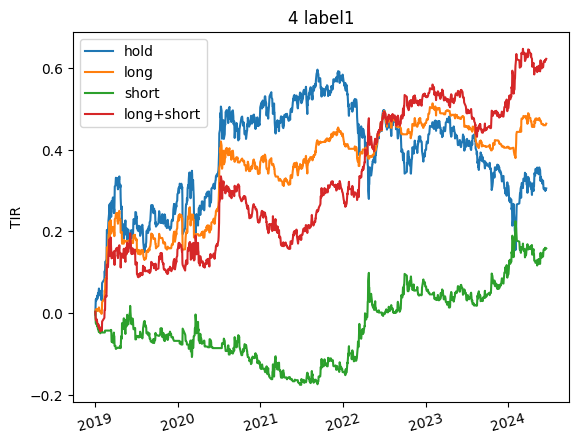

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('4 label1')
# mean, 标准化

Text(0.5, 1.0, '300 label1')

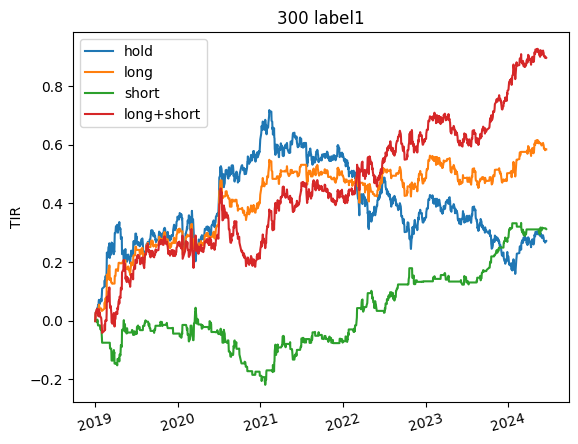

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('300 label1')
# mean, 标准化

Text(0.5, 1.0, '300 label1')

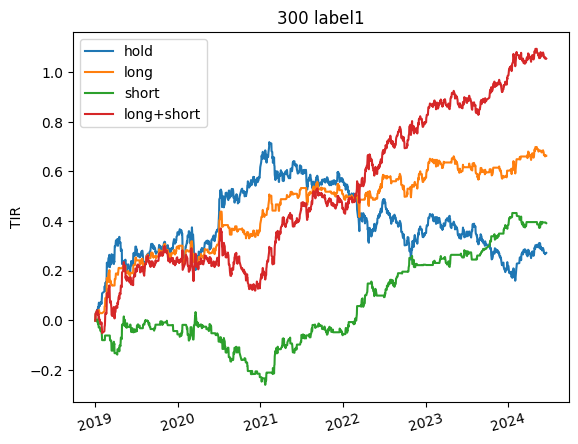

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('300 label1')
# mean, 标准化

Text(0.5, 1.0, '300 label1')

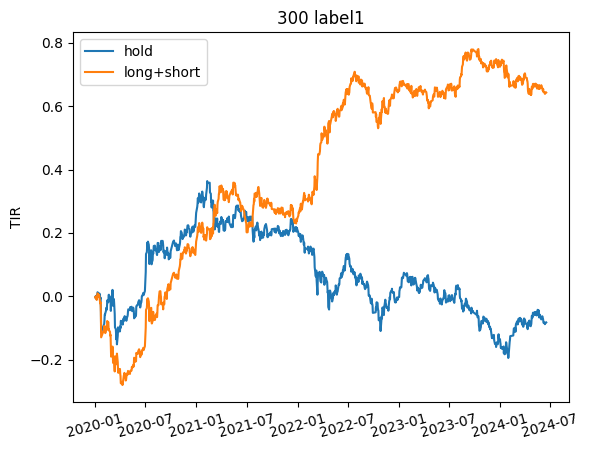

In [ ]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(pred11['index'],pred11['hold'],label='hold')
# plt.plot(pred11['index'],pred11['TIR'],label='long')
# plt.plot(pred11['index'],pred11['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(pred11['index'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('300 label1')
# mean, 标准化

In [ ]:
test = pd.read_csv('../data/hq_index.csv', index_col=0)

test = test[test['STOCK_CODE'] =='000300'].reset_index(drop=True )
# test = test[test['STOCK_CODE'].isin(['000016','000001'])].reset_index(drop=True )
# 如果要跑全市场的，

test = test.sort_values(by=['END_DATE', 'STOCK_CODE'])
    
test['NEXT_CLOSE'] = test.groupby('STOCK_CODE',group_keys=False)['CLOSE'].shift(-1)

In [ ]:
# 去除前60天的NaN数据
dev_test = test.dropna().reset_index(drop=True)

# 创建1日标签
dev_test['label'] = dev_test['NEXT_CLOSE'].div( dev_test['CLOSE'], axis=0)-1

In [ ]:
train_start_date = '1990-12-19'
train_end_date = '2017-12-31'
valid_start_date = '2018-01-01'
valid_end_date = '2018-12-31'
test_start_date = '2019-01-01'
test_end_date = '2024-06-18'

In [ ]:
train = dev_test[(dev_test['END_DATE'] >= train_start_date) & (dev_test['END_DATE'] <= train_end_date)]
val = dev_test[(dev_test['END_DATE'] >= valid_start_date) & (dev_test['END_DATE'] <= valid_end_date)]
test = dev_test[(dev_test['END_DATE'] >= test_start_date) & (dev_test['END_DATE'] <= test_end_date)]


In [ ]:
labels = 'label'
def cal_cumsum_hold0(top_800_stocks):
    daily_scores_sum = top_800_stocks.groupby('END_DATE')[labels].mean().reset_index()
    daily_scores_sum['TIR'] = daily_scores_sum[labels].cumsum()
    return daily_scores_sum
daily_scores_sum_hold = cal_cumsum_hold0(train)
daily_scores_sum_hold[-1:]

,END_DATE,label,TIR
3158,2017-12-29,0.014028,1.926132


In [ ]:
daily_scores_sum_hold = cal_cumsum_hold0(val)
daily_scores_sum_hold[-1:]

,END_DATE,label,TIR
242,2018-12-28,-0.013658,-0.297234


In [ ]:
daily_scores_sum_hold = cal_cumsum_hold0(test)
daily_scores_sum_hold[-1:]

,END_DATE,label,TIR
1321,2024-06-17,0.002656,0.271638
